# The Spark Foundation : # GRIP JULY2021

## Task-1:Prediction using Supervised ML

In this regression task we will try to predict the percentage of marks that a student is expected to score based on the number of study hours they studied.This is a simple linear regression task as it involves only two varibles.

### Author:Nitheesh Kumar Gorla

## Linear Regression
Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:

Discreet/continuous independent variables

A best-fit regression line

Continuous dependent variable. i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables. The equation of the Linear Regression is:

                                          Y=a+b*X + e 
Where, a is the intercept, b is the slope of the line, and e is the error term. The equation above is used to predict the value of the target variable based on the given predictor variable(s).

#### dataset url : http://bit.ly/w-data

In [168]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# importing the dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("data imported successfully..!")
data.head(10)

data imported successfully..!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [170]:
# to find the number of rows and columns in data
data.shape

(25, 2)

In [171]:
data.columns  # printing column names

Index(['Hours', 'Scores'], dtype='object')

In [172]:
data.info()    # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [173]:
data.describe()  # more statistics about dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [174]:
# finding the count of missing values from different columns
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

from the above data we can clearly see that there are no null values in the data.Lets visualize the dataset for better understanding

In [175]:
data.corr()  # to find correlation between independent and dependent varible

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


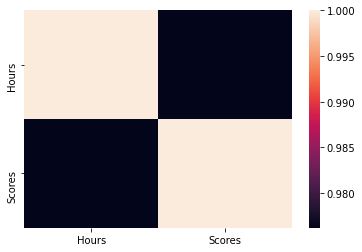

In [176]:
corr_def=sns.heatmap(data.corr()) # heatmap to visulize the correlation

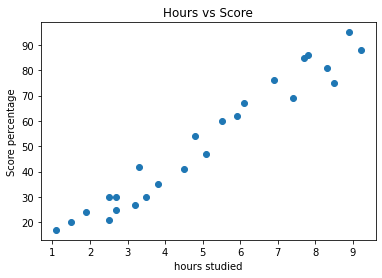

In [177]:
# scatter plot to find the distribution of data
plt.scatter(x=data.Hours,y=data.Scores)  
plt.title("Hours vs Score")
plt.xlabel("hours studied")
plt.ylabel("Score percentage")
plt.show()

##### From the above plot we can see that indepedent varible hours and  depedent/target varible scores are highly positive correlated 

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

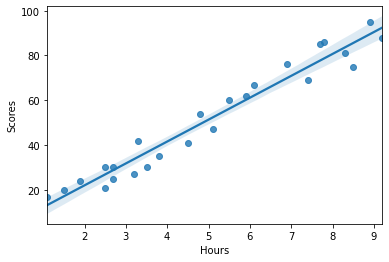

In [178]:
sns.regplot(x=data.Hours,y=data.Scores,data=data) # regression plot

### preparing the data

#### spliting the dataset for training and testing

In [179]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)  # using 80% of data for training and 20% of data for testing

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [181]:
# impoorting the linear regression model from sklearn
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)  # fitting the data to the model

LinearRegression()

In [182]:
# coefficient and intercept

print("coefficient:",regressor.coef_)
print("intercept:",regressor.intercept_)

coefficient: [9.91065648]
intercept: 2.018160041434683


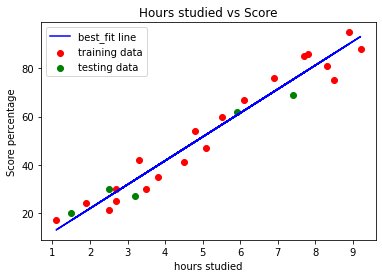

In [183]:
# plotting the regression line

regression_line=regressor.coef_*X + regressor.intercept_     # y= b0+b1*x

plt.scatter(X_train,Y_train,label="training data",c='red')
plt.scatter(X_test,Y_test,label="testing data",c='green')
plt.plot(X,regression_line,'r',label="best_fit line",c='blue')
plt.title("Hours studied vs Score")
plt.xlabel("hours studied")
plt.ylabel("Score percentage")
plt.legend()
plt.show()

### Making Predictions

In [184]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [185]:
y_pred=regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [186]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [187]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


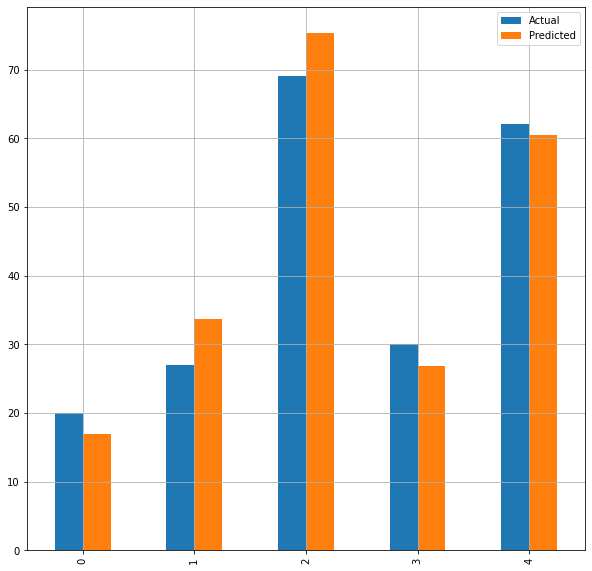

In [188]:
# plotting for actual vs predicted
df.plot(kind='bar',figsize=(10,10))
plt.grid()
plt.show()

In [189]:
# to find the accuracy of the tarining and testing models
print("training accuracy:",regressor.score(X_train,Y_train))
print("testing accuracy:",regressor.score(X_test,Y_test))

training accuracy: 0.9515510725211552
testing accuracy: 0.9454906892105356


### What will be predicted score if a student studies for 9.25 hrs/ day? 


In [190]:
# You can also test with your own data
hours =[[9.25]]
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {round(own_pred[0],4)}")

No of Hours = [[9.25]]
Predicted Score = 93.6917


### making predictions by users input hours data 

In [191]:
hours_studied=float(input("enter no.of hours studied:"))
h=np.array(hours_studied).reshape(-1,1)
user_pred=regressor.predict(h)
print(f"predicted score:{user_pred[0]}")


enter no.of hours studied:9.25
predicted score:93.69173248737538


### Evaluation of the model 

#### The final step is to evaluate the  difference performance metrics of the algorithm 

In [192]:
from sklearn import metrics  
from sklearn.metrics import r2_score
MAE=metrics.mean_absolute_error(Y_test, y_pred)
MSE=metrics.mean_squared_error(Y_test, y_pred)
RMSE=np.sqrt(MSE)
r2score=r2_score(Y_test,y_pred)*100
print('Mean Absolute Error:', MAE) 
print('Mean squared Error:', MSE)
print('Root Mean squared Error:', RMSE)

print("R2score:",r2score)


Mean Absolute Error: 4.183859899002975
Mean squared Error: 21.5987693072174
Root Mean squared Error: 4.6474476121003665
R2score: 94.54906892105356


### Conclusion 

### If the student studies for 9.25 hrs/day the expected score will be 93.6917